In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
sess = tf.InteractiveSession()

In [7]:
# 初始参数设置
in_units = 784
h1_units = 300
w1 = tf.Variable(tf.truncated_normal(shape=[h1_units, in_units], stddev=0.1))
b1 = tf.Variable(tf.zeros([h1_units, 1]))
w2 = tf.Variable(tf.zeros([10, h1_units]))
b2 = tf.Variable(tf.zeros([10, 1]))

In [8]:
# 占位变量： X -> 输入， keep_prob -> dropout的参数，保留节点的比率
X = tf.placeholder(dtype=tf.float32, shape=[in_units, None])
keep_prob = tf.placeholder(dtype=tf.float32)

In [9]:
# 过程隐层运算定义
hidden1 = tf.nn.relu(w1 @ X + b1)  # shape: h1_units * m
hidden1_drop = tf.nn.dropout(hidden1, keep_prob=keep_prob)  # dropout randomly on each ele
y = tf.nn.softmax(w2 @ hidden1_drop + b2)  # shape: 10 * m

In [10]:
# 损失函数定义
y_ = tf.placeholder(dtype=tf.float32, shape=[10, None])  # shape: 10 * m
cost = tf.reduce_mean(-tf.reduce_sum(tf.multiply(y_, tf.log(y)), axis=0))  # cross entropy

In [11]:
# 训练及评估过程定义
train_step = tf.train.AdagradOptimizer(learning_rate=0.3).minimize(cost)
correct_prediction = tf.equal(tf.argmax(y, axis=0), tf.argmax(y_, axis=0))
acc = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [12]:
# 实施训练及预测
tf.global_variables_initializer().run()
test_holder = {X: mnist.test.images.T, y_: mnist.test.labels.T, keep_prob: 1.0}
display_step = 100
test_acc_list = []
for i in range(3001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={X: batch_xs.T, y_: batch_ys.T, keep_prob: 0.75})
    if i % display_step == 0:
        test_acc = sess.run(acc, feed_dict=test_holder)
        test_acc_list.append(test_acc)
        print("epoch %d test_acc: %.4f" % (i, test_acc))        

epoch 0 test_acc: 0.6970
epoch 100 test_acc: 0.9208
epoch 200 test_acc: 0.9403
epoch 300 test_acc: 0.9516
epoch 400 test_acc: 0.9524
epoch 500 test_acc: 0.9569
epoch 600 test_acc: 0.9601
epoch 700 test_acc: 0.9637
epoch 800 test_acc: 0.9647
epoch 900 test_acc: 0.9666
epoch 1000 test_acc: 0.9672
epoch 1100 test_acc: 0.9680
epoch 1200 test_acc: 0.9708
epoch 1300 test_acc: 0.9688
epoch 1400 test_acc: 0.9711
epoch 1500 test_acc: 0.9688
epoch 1600 test_acc: 0.9716
epoch 1700 test_acc: 0.9744
epoch 1800 test_acc: 0.9734
epoch 1900 test_acc: 0.9725
epoch 2000 test_acc: 0.9742
epoch 2100 test_acc: 0.9741
epoch 2200 test_acc: 0.9749
epoch 2300 test_acc: 0.9754
epoch 2400 test_acc: 0.9744
epoch 2500 test_acc: 0.9749
epoch 2600 test_acc: 0.9772
epoch 2700 test_acc: 0.9757
epoch 2800 test_acc: 0.9763
epoch 2900 test_acc: 0.9759
epoch 3000 test_acc: 0.9768


In [13]:
import matplotlib.pyplot as plt

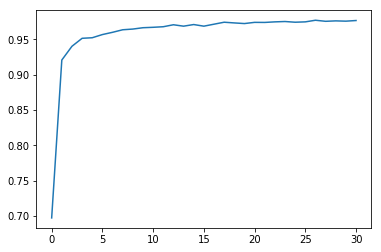

In [14]:
plt.plot(test_acc_list)
plt.show()